In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
datas = pd.read_csv('car performance.csv')
datas

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
type(datas)

pandas.core.frame.DataFrame

In [5]:
datas.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [6]:
datas["car name"] = [name.split()[0]  for name in datas["car name"]]
datas

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford
394,44.0,4,97.0,52,2130,24.6,82,2,vw
395,32.0,4,135.0,84,2295,11.6,82,1,dodge
396,28.0,4,120.0,79,2625,18.6,82,1,ford


In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [8]:
xi = datas.drop(["mpg","car name"],axis=1)
xi = sm.add_constant(xi)
xi.sample(4)

,const,cylinders,displacement,horsepower,weight,acceleration,model year,origin
169,1.0,6,232.0,100,2914,16.0,75,1
115,1.0,8,350.0,145,4082,13.0,73,1
145,1.0,4,83.0,61,2003,19.0,74,3
73,1.0,8,307.0,130,4098,14.0,72,1


In [9]:
vif_data = pd.DataFrame()
vif_data["Variable"] = xi.columns

In [10]:
vif_data["values"] = [variance_inflation_factor(xi.values,i) for i in range(xi.shape[1])]
vif_data

,Variable,values
0,const,764.948909
1,cylinders,10.704347
2,displacement,21.941912
3,horsepower,9.697609
4,weight,10.680202
5,acceleration,2.568888
6,model year,1.250699
7,origin,1.749349


In [11]:
x1 = datas.drop(["mpg","car name","displacement"],axis=1)
x1 = sm.add_constant(x1)
x1.sample(4)

,const,cylinders,horsepower,weight,acceleration,model year,origin
355,1.0,4,75,2210,14.4,81,3
336,1.0,4,88,2905,14.3,80,1
197,1.0,4,70,1937,14.2,76,2
271,1.0,4,105,2745,16.7,78,1


In [12]:
vif_data = pd.DataFrame()
vif_data["Variable"] = x1.columns
vif_data["values"] = [variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
vif_data

,Variable,values
0,const,760.738609
1,cylinders,5.937022
2,horsepower,8.864865
3,weight,9.018682
4,acceleration,2.539199
5,model year,1.245532
6,origin,1.576197


In [13]:
datas.drop(["displacement"],axis=1,inplace=True)
datas.sample(4)

,mpg,cylinders,horsepower,weight,acceleration,model year,origin,car name
6,14.0,8,220,4354,9.0,70,1,chevrolet
205,28.0,4,75,2155,16.4,76,3,toyota
203,29.5,4,71,1825,12.2,76,2,volkswagen
304,37.3,4,69,2130,14.7,79,2,fiat


In [14]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
datas['car name'] = l.fit_transform(datas['car name'].values.reshape(-1,1))


C:\Users\91789\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
import pickle
pickle.dump(l,open('encoder.pkl','wb'))

In [16]:
datas

,mpg,cylinders,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,130,3504,12.0,70,1,7
1,15.0,8,165,3693,11.5,70,1,3
2,18.0,8,150,3436,11.0,70,1,25
3,16.0,8,150,3433,12.0,70,1,0
4,17.0,8,140,3449,10.5,70,1,13
...,...,...,...,...,...,...,...,...
393,27.0,4,86,2790,15.6,82,1,13
394,44.0,4,52,2130,24.6,82,2,36
395,32.0,4,84,2295,11.6,82,1,11
396,28.0,4,79,2625,18.6,82,1,13


In [17]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    int64  
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car name      398 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 23.4 KB


In [18]:
datas['car name'].unique()

array([ 7,  3, 25,  0, 13, 26, 11, 30, 10, 34, 24,  1, 28,  2,  8, 14, 20,
       23, 12, 22,  9, 17, 35, 27, 31, 16, 15, 29,  6,  5, 36, 19,  4, 18,
       33, 32, 21])

In [19]:
x = datas.iloc[:,1:].values
x.shape

(398, 7)

In [20]:
y = datas.iloc[:,0].values
y.shape

(398,)

In [21]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
xpred = ms.fit_transform(x)
xpred

array([[1.        , 0.45652174, 0.5361497 , ..., 0.        , 0.        ,
        0.19444444],
       [1.        , 0.64673913, 0.58973632, ..., 0.        , 0.        ,
        0.08333333],
       [1.        , 0.56521739, 0.51686986, ..., 0.        , 0.        ,
        0.69444444],
       ...,
       [0.2       , 0.20652174, 0.19336547, ..., 1.        , 0.        ,
        0.30555556],
       [0.2       , 0.17934783, 0.2869294 , ..., 1.        , 0.        ,
        0.36111111],
       [0.2       , 0.19565217, 0.31386447, ..., 1.        , 0.        ,
        0.22222222]])

In [22]:
import pickle
pickle.dump(ms,open('scaler.pkl','wb'))

In [23]:
from sklearn.decomposition import PCA

In [24]:
p = PCA()
p.fit(xpred)

PCA()

In [25]:
reduced_predictor = p.transform(xpred)
reduced_predictor

array([[ 0.74941655,  0.27083201, -0.23772838, ..., -0.02296859,
         0.20060865, -0.04163006],
       [ 0.85650728,  0.28654132, -0.23993729, ..., -0.08550077,
         0.08329525,  0.05057605],
       [ 0.67440421,  0.47295546,  0.03020007, ..., -0.12344762,
         0.18167829,  0.02795596],
       ...,
       [-0.15373242, -0.60107684,  0.0654013 , ..., -0.38135432,
         0.0228429 , -0.05657048],
       [-0.19883969, -0.64904271,  0.07377257, ...,  0.00820618,
        -0.09286963,  0.03553197],
       [-0.16009416, -0.69772956,  0.01091441, ...,  0.05536706,
        -0.12760591,  0.04928283]])

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(xpred,y,test_size=0.2,random_state=1)

In [27]:
x_train.shape

(318, 7)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [29]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid={"n_estimators":np.arange(1,60),"criterion":["mse","mae"],"max_depth":np.arange(2,10),"random_state":[1]},scoring="neg_mean_squared_error",cv=5)
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59]),
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [30]:
rf_grid.best_params_

{'criterion': 'mae', 'max_depth': 9, 'n_estimators': 35, 'random_state': 1}

In [31]:
rf = RandomForestRegressor(n_estimators=35,criterion="mae",max_depth=9,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=9, n_estimators=35,
                      random_state=0)

In [32]:

y_pred = rf.predict(x_test)

In [33]:
from sklearn.metrics import r2_score
rf_test = r2_score(y_test,y_pred)  # test data
rf_test

0.8903367448511758

In [34]:
rf_train = r2_score(y_train,rf.predict(x_train))  # train data
rf_train

0.9745650584731822

In [35]:
model = RandomForestRegressor(n_estimators=35,max_depth=9,criterion="mae",random_state=0)
model.fit(xpred,y)

RandomForestRegressor(criterion='mae', max_depth=9, n_estimators=35,
                      random_state=0)

In [36]:
model.score(xpred,y)

0.9684161132217322

In [37]:
import pickle
pickle.dump(model,open('regression.pkl','wb'))

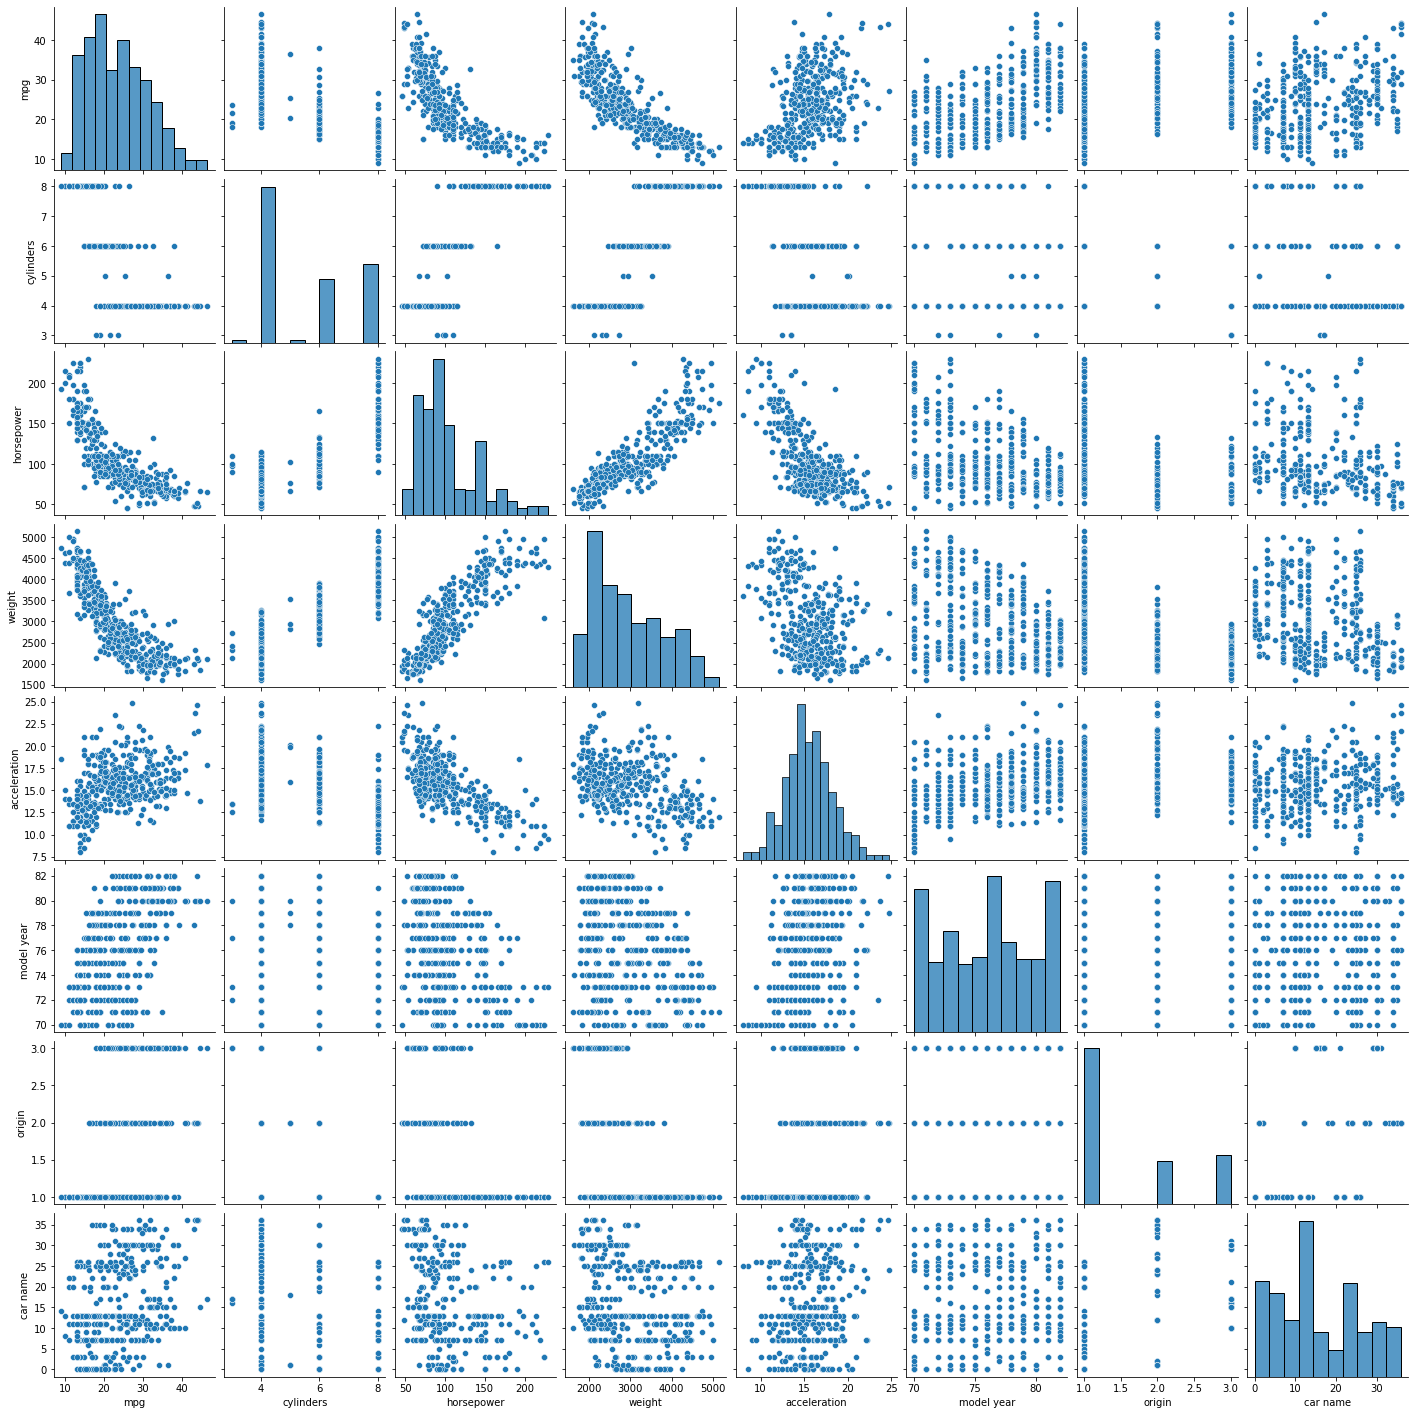

In [38]:
import seaborn as sns
sns.pairplot(data=datas)
